<a href="https://www.kaggle.com/code/mohamedbakrey/reveal-humor-using-short-texts-classification-ml?scriptVersionId=94358543" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# loading Library


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# for calculating Polarity and Subjectivity
from textblob import TextBlob
import seaborn as sns
import wordcloud
import re
from sklearn.model_selection import train_test_split
import tensorflow as tf


# 1. Read the data

In [2]:
df=pd.read_csv('../input/200k-short-texts-for-humor-detection/dataset.csv')

In [3]:
# shape of data
print("Shape of Data:",df.shape)
df.head(10)

Shape of Data: (200000, 2)


,text,humor
0,"Joe biden rules out 2020 bid: 'guys, i'm not r...",False
1,Watch: darvish gave hitter whiplash with slow ...,False
2,What do you call a turtle without its shell? d...,True
3,5 reasons the 2016 election feels so personal,False
4,"Pasco police shot mexican migrant from behind,...",False
5,"Martha stewart tweets hideous food photo, twit...",False
6,What is a pokemon master's favorite kind of pa...,True
7,Why do native americans hate it when it rains ...,True
8,"Obama's climate change legacy is impressive, i...",False
9,"My family tree is a cactus, we're all pricks.",True


In [4]:
# information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    200000 non-null  object
 1   humor   200000 non-null  bool  
dtypes: bool(1), object(1)
memory usage: 1.7+ MB


In [5]:
# check the if we have null value
df.isna().sum()

text     0
humor    0
dtype: int64

In [6]:
df['text'].value_counts().tail()

My email password has been hacked. that's the third time i've had to rename the cat.                 1
Donald trump wants to break up big banks                                                             1
Why did the witch go to the psychiatrist? because she thought everybody loved her.                   1
What's the difference between a black man and batman? batman can walk into a store without robin.    1
An irish man walks on the street and ignores a bar... muahahaha, like that's possible!               1
Name: text, dtype: int64

In [7]:
# check how much we have of false and True
df['humor'].value_counts()

False    100000
True     100000
Name: humor, dtype: int64

Text(0.5, 1.0, 'Sentiment Data Distribution')

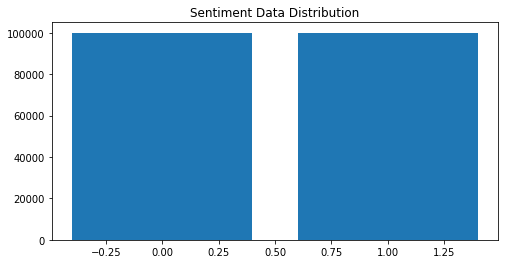

In [8]:
val_count = df.humor.value_counts()

plt.figure(figsize=(8,4))
plt.bar(val_count.index, val_count.values)
plt.title("Sentiment Data Distribution")

### Find the Text Polarity

In [9]:
# Lets calculate the Polarity of the Reviews
def get_polarity(text):
    textblob = TextBlob(str(text.encode('utf-8')))
    pol = textblob.sentiment.polarity
    return pol

# lets apply the function
df['polarity'] = df['text'].apply(get_polarity)

In [10]:
# Lets calculate the Subjectvity of the Reviews
def get_subjectivity(text):
    textblob = TextBlob(str(text.encode('utf-8')))
    subj = textblob.sentiment.subjectivity
    return subj

# lets apply the Function
df['subjectivity'] = df['text'].apply(get_subjectivity)

In [11]:
## lets summarize the Newly Created Features
df[['polarity','subjectivity']].describe()

,polarity,subjectivity
count,200000.000000,200000.000000
mean,0.052513,0.309548
std,0.288698,0.330089
min,-1.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.233333
75%,0.136364,0.538889
max,1.000000,1.000000


# 3. Data Visualization

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


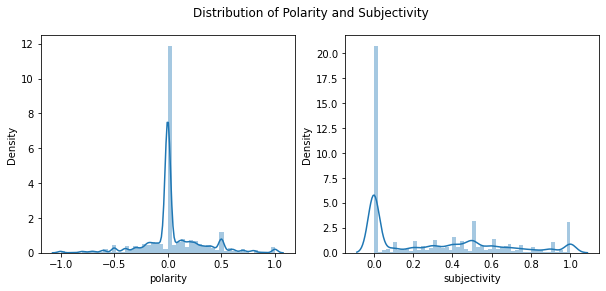

In [12]:
## Visualizing Polarity and Subjectivity

plt.rcParams['figure.figsize'] = (10, 4)

plt.subplot(1, 2, 1)
sns.distplot(df['polarity'])

plt.subplot(1, 2, 2)
sns.distplot(df['subjectivity'])

plt.suptitle('Distribution of Polarity and Subjectivity')
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


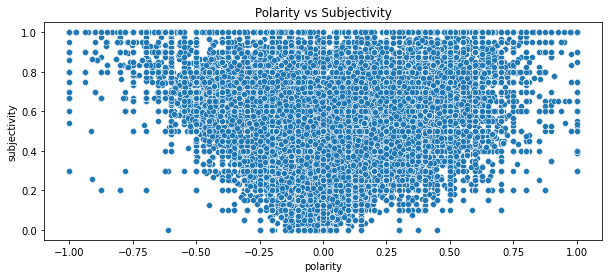

In [13]:
# lets check relation between Polarity and Subjectivity

sns.scatterplot(df['polarity'], df['subjectivity'])
plt.title('Polarity vs Subjectivity')
plt.show()

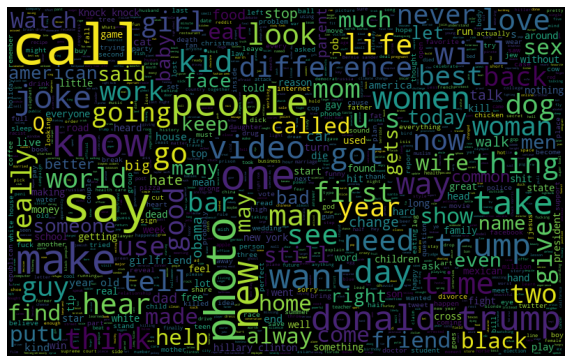

In [14]:
wc = wordcloud.WordCloud(stopwords=wordcloud.STOPWORDS, max_font_size=80, max_words=5000,
                      width = 800, height = 500,
                      background_color='black').generate(' '.join(txt for txt in df["text"]))
fig, ax = plt.subplots(figsize=(10,7))
ax.imshow(wc, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wc)

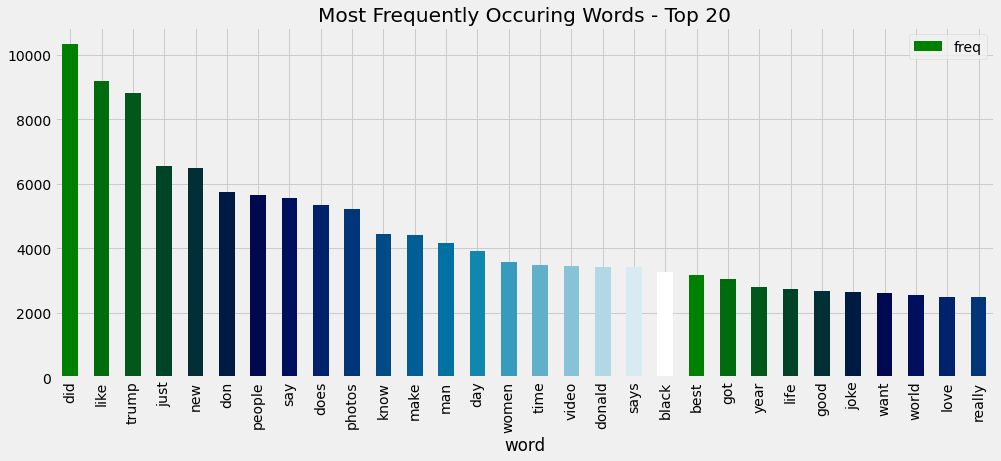

In [15]:
## Visualizing the Most Frequent Words

from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(df.text)
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

plt.style.use('fivethirtyeight')
color = plt.cm.ocean(np.linspace(0, 1, 20))
frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 6), color = color)
plt.title("Most Frequently Occuring Words - Top 20")
plt.show()

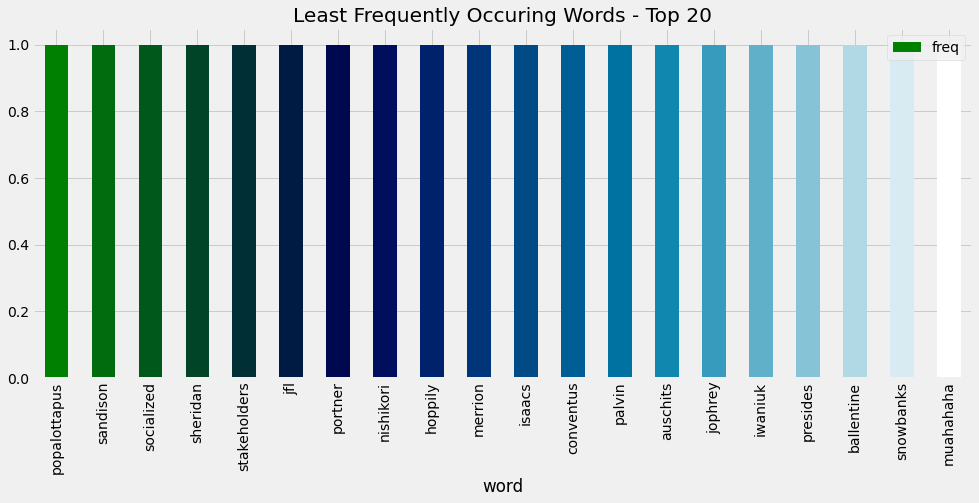

In [16]:
## Visualizing the Least Frequent Words

from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(df.text)
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

plt.style.use('fivethirtyeight')
color = plt.cm.ocean(np.linspace(0, 1, 20))
frequency.tail(20).plot(x='word', y='freq', kind='bar', figsize=(15, 6), color = color)
plt.title("Least Frequently Occuring Words - Top 20")
plt.show()

# 4. Data Cleaning

In [17]:
# Create a function to remove special characters
def remove_special_characters(text):
    pat = r'[^a-zA-z0-9]' 
    return re.sub(pat, ' ', text)
 
# lets apply this function
df['text'] = df.apply(lambda x: remove_special_characters(x['text']), axis = 1)

In [18]:
# lets make a function to remove Numbers from the reviews
import re
def drop_numbers(list_text):
    list_text_new = []
    for i in list_text:
        if not re.search('\d', i):
            list_text_new.append(i)
    return ''.join(list_text_new)

df['text'] = df['text'].apply(drop_numbers)

In [19]:
from nltk.corpus import stopwords

stop = set(stopwords.words("english"))


def remove_stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in stop]

    return " ".join(text)

In [20]:
df["text"] = df["text"].map(remove_stopwords)

In [21]:
df.text

0                          joe biden rules bid guys running
1             watch darvish gave hitter whiplash slow pitch
2                            call turtle without shell dead
3                           reasons election feels personal
4         pasco police shot mexican migrant behind new a...
                                ...                        
199995    conor maynard seamlessly fits old school r b h...
199996                            make holy water boil hell
199997    many optometrists take screw lightbulb one two...
199998       mcdonald officially kick day breakfast october
199999    irish man walks street ignores bar muahahaha l...
Name: text, Length: 200000, dtype: object

# 5. Data Processing

In [22]:
# creating bag of words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)

x = cv.fit_transform(df['text']).toarray()
y = df['humor'].values
print(x.shape)
print(y.shape)

(200000, 2500)
(200000,)


In [23]:

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [24]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Using ML Algorithms

#  DecisionTreeClassifier

In [25]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [26]:
pred=classifier.predict(X_test)
pred

array([False, False,  True, ..., False,  True,  True])

In [29]:
print('model_DT Train Score is : ' , classifier.score(X_train, y_train))
print('model_DT Test Score is : ' , classifier.score(X_test, y_test))

model_DT Train Score is :  0.9945333333333334
model_DT Test Score is :  0.81134


In [30]:
from sklearn.metrics import accuracy_score
print("The Score is: ",accuracy_score(y_test , pred)*100)

The Score is:  81.134


In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

       False       0.81      0.81      0.81     24912
        True       0.81      0.81      0.81     25088

    accuracy                           0.81     50000
   macro avg       0.81      0.81      0.81     50000
weighted avg       0.81      0.81      0.81     50000



In [61]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix #for model evaluation
confusion_matrix=confusion_matrix(y_test,pred)
confusion_matrix

array([[20138,  4774],
       [ 4659, 20429]])

<AxesSubplot:>

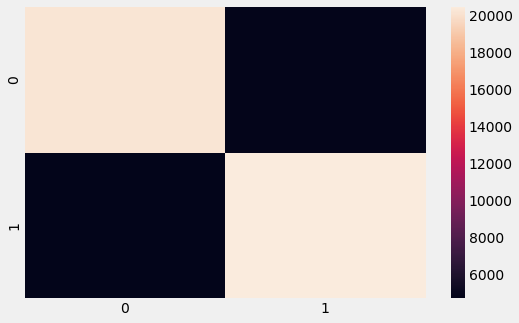

In [65]:
sns.heatmap(confusion_matrix)

In [66]:
total=sum(sum(confusion_matrix))

sensitivity = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[1,0])
print('Sensitivity : ', sensitivity )

specificity = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[0,1])
print('Specificity : ', specificity)

Sensitivity :  0.8121143686736298
Specificity :  0.8105781057810578


In [67]:
total=sum(sum(confusion_matrix))

ppv = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[0,1])
print('ppv : ', ppv )

npv = confusion_matrix[1,1]/(confusion_matrix[1,0]+confusion_matrix[1,1])
print('npv : ', npv)

ppv :  0.8083654463712268
npv :  0.8142936862244898


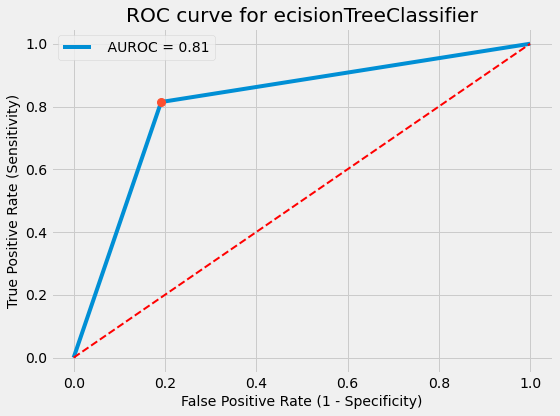

In [69]:
from sklearn.metrics import roc_curve, auc #for model evaluation
from matplotlib import pyplot
fig, (ax2) = plt.subplots(figsize = (8,6))
        #roc-curve
fpr, tpr, thresholds_roc = roc_curve(y_test,pred)
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " AUROC = {:0.2f}".format(roc_auc))
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)
ax2.legend(loc = 'best')
plt.title('ROC curve for ecisionTreeClassifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
        #find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()

# RandomForestClassifier

In [33]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier1 = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 42)
classifier1.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=42)

In [43]:
# Predicting the Test set results
y_pred = classifier1.predict(X_test)
y_pred

array([ True, False,  True, ..., False,  True,  True])

In [44]:
print('model_DT Train Score is : ' , classifier1.score(X_train, y_train))
print('model_DT Test Score is : ' , classifier1.score(X_test, y_test))

model_DT Train Score is :  0.9945266666666667
model_DT Test Score is :  0.85074


In [45]:
print("The Score is: ",accuracy_score(y_test , y_pred)*100)

The Score is:  85.07400000000001


In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.86      0.83      0.85     24912
        True       0.84      0.87      0.85     25088

    accuracy                           0.85     50000
   macro avg       0.85      0.85      0.85     50000
weighted avg       0.85      0.85      0.85     50000



In [50]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix #for model evaluation
confusion_matrix=confusion_matrix(y_test,y_pred)
confusion_matrix

array([[20709,  4203],
       [ 3260, 21828]])

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


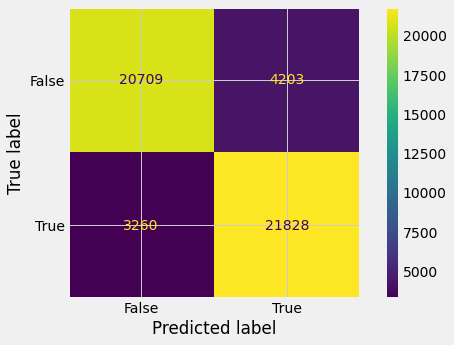

In [54]:
import matplotlib

matplotlib.rcParams['figure.figsize'] = (8,5)
plot_confusion_matrix(classifier1,X_test,y_test);

In [55]:
total=sum(sum(confusion_matrix))

sensitivity = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[1,0])
print('Sensitivity : ', sensitivity )

specificity = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[0,1])
print('Specificity : ', specificity)

Sensitivity :  0.8639909883599649
Specificity :  0.8385386654373631


In [56]:
total=sum(sum(confusion_matrix))

ppv = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[0,1])
print('ppv : ', ppv )

npv = confusion_matrix[1,1]/(confusion_matrix[1,0]+confusion_matrix[1,1])
print('npv : ', npv)

ppv :  0.8312861271676301
npv :  0.8700573979591837


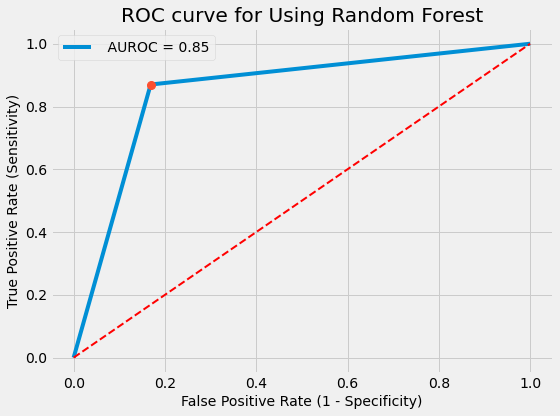

In [58]:
from sklearn.metrics import roc_curve, auc #for model evaluation
from matplotlib import pyplot
fig, (ax2) = plt.subplots(figsize = (8,6))
        #roc-curve
fpr, tpr, thresholds_roc = roc_curve(y_test,y_pred)
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " AUROC = {:0.2f}".format(roc_auc))
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)
ax2.legend(loc = 'best')
plt.title('ROC curve for Using Random Forest')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
        #find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()